In [1]:
#set directory
import os
os.chdir("C:/Users/pauli/OneDrive/Documentos/Classes 2023/311_tech")
os.getcwd()

'C:\\Users\\pauli\\OneDrive\\Documentos\\Classes 2023\\311_tech'

In [2]:
import pandas as pd
import seaborn as sns
from scipy.stats import chi2_contingency

In [3]:
# Read the Excel file into a pandas dataframe
df = pd.read_excel("salary_data_states.xlsx")

In [4]:
df.head()

,CASE_NUMBER,CASE_STATUS,CASE_RECEIVED_DATE,DECISION_DATE,EMPLOYER_NAME,PREVAILING_WAGE_SUBMITTED,PREVAILING_WAGE_SUBMITTED_UNIT,PAID_WAGE_SUBMITTED,PAID_WAGE_SUBMITTED_UNIT,JOB_TITLE,...,PREVAILING_WAGE_SOC_TITLE,WORK_STATE,WORK_STATE_ABBREVIATION,WORK_POSTAL_CODE,FULL_TIME_POSITION_Y_N,VISA_CLASS,PREVAILING_WAGE_PER_YEAR,PAID_WAGE_PER_YEAR,JOB_TITLE_SUBGROUP,order
0,I-200-14073-248840,denied,3/14/2014,3/21/2014,"ADVANCED TECHNOLOGY GROUP USA, INC.",6217100.0,year,62171.0,year,SOFTWARE ENGINEER,...,"Software Developers, Applications",Illinois,IL,NaN,y,H-1B,NaN,62171.0,software engineer,1
1,A-15061-55212,denied,3/19/2015,3/19/2015,SAN FRANCISCO STATE UNIVERSITY,5067600.0,year,91440.0,year,Assistant Professor of Marketing,...,"Business Teachers, Postsecondary",California,CA,94132.0,NaN,greencard,NaN,91440.0,assistant professor,2
2,I-200-13256-001092,denied,9/13/2013,9/23/2013,CAROUSEL SCHOOL,4947000.0,year,49470.0,year,SPECIAL EDUCATION TEACHER,...,"Special Education Teachers, Kindergarten and E...",California,CA,NaN,y,H-1B,NaN,49470.0,teacher,3
3,I-200-14087-353657,denied,3/28/2014,4/7/2014,HARLINGEN CONSOLIDATED INDEPENDENT SCHOOL DIST...,251052.0,month,43800.0,year,SCIENCE TEACHER,...,"Biological Science Teachers, Postsecondary",Texas,TX,NaN,y,H-1B,NaN,43800.0,teacher,4
4,I-203-14259-128844,denied,9/16/2014,9/23/2014,SIGNAL SCIENCES CORPORATION,84573.0,bi-weekly,170000.0,year,SENIOR SOFTWARE ENGINEER,...,"Software Developers, Systems Software",Oregon,OR,NaN,y,E-3 Australian,NaN,170000.0,software engineer,5


In [6]:
df.shape


(167278, 27)

In [7]:
df.columns

Index(['CASE_NUMBER', 'CASE_STATUS', 'CASE_RECEIVED_DATE', 'DECISION_DATE',
       'EMPLOYER_NAME', 'PREVAILING_WAGE_SUBMITTED',
       'PREVAILING_WAGE_SUBMITTED_UNIT', 'PAID_WAGE_SUBMITTED',
       'PAID_WAGE_SUBMITTED_UNIT', 'JOB_TITLE', 'WORK_CITY',
       'EDUCATION_LEVEL_REQUIRED', 'COLLEGE_MAJOR_REQUIRED',
       'EXPERIENCE_REQUIRED_Y_N', 'EXPERIENCE_REQUIRED_NUM_MONTHS',
       'COUNTRY_OF_CITIZENSHIP', 'PREVAILING_WAGE_SOC_CODE',
       'PREVAILING_WAGE_SOC_TITLE', 'WORK_STATE', 'WORK_STATE_ABBREVIATION',
       'WORK_POSTAL_CODE', 'FULL_TIME_POSITION_Y_N', 'VISA_CLASS',
       'PREVAILING_WAGE_PER_YEAR', 'PAID_WAGE_PER_YEAR', 'JOB_TITLE_SUBGROUP',
       'order'],
      dtype='object')

In [8]:
data_jobsubtitles = ['software engineer', 'business analyst', 'management consultant', 'data analyst', 'data scientist']

In [9]:
# filter the rows based on data_jobsubtitles
data = df[df['JOB_TITLE_SUBGROUP'].isin(data_jobsubtitles)].copy()

data.shape

(133012, 27)

In [10]:
print(data.isnull().sum())

CASE_NUMBER                            0
CASE_STATUS                            0
CASE_RECEIVED_DATE                     0
DECISION_DATE                          0
EMPLOYER_NAME                          0
PREVAILING_WAGE_SUBMITTED              0
PREVAILING_WAGE_SUBMITTED_UNIT         0
PAID_WAGE_SUBMITTED                    0
PAID_WAGE_SUBMITTED_UNIT               0
JOB_TITLE                              0
WORK_CITY                              3
EDUCATION_LEVEL_REQUIRED          124106
COLLEGE_MAJOR_REQUIRED            124135
EXPERIENCE_REQUIRED_Y_N           124106
EXPERIENCE_REQUIRED_NUM_MONTHS    128328
COUNTRY_OF_CITIZENSHIP            124106
PREVAILING_WAGE_SOC_CODE               0
PREVAILING_WAGE_SOC_TITLE              0
WORK_STATE                             0
WORK_STATE_ABBREVIATION                0
WORK_POSTAL_CODE                   86753
FULL_TIME_POSITION_Y_N              8906
VISA_CLASS                             0
PREVAILING_WAGE_PER_YEAR              40
PAID_WAGE_PER_YE

In [11]:
top_10_soc_titles = data['PREVAILING_WAGE_SOC_TITLE'].value_counts().nlargest(25)
print(top_10_soc_titles)

Software Developers, Applications                     52066
SOFTWARE DEVELOPERS, APPLICATIONS                     21085
Software Developers, Systems Software                 13176
Computer Systems Analysts                             12186
Management Analysts                                    5885
COMPUTER SYSTEMS ANALYSTS                              4832
SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE                  3524
Computer Programmers                                   2338
MANAGEMENT ANALYSTS                                    2276
Computer Occupations, All Other                        2191
Operations Research Analysts                           1469
COMPUTER PROGRAMMERS                                   1385
COMPUTER OCCUPATIONS, ALL OTHER                        1276
Computer Software Engineers, Applications              1009
Financial Analysts                                      714
OPERATIONS RESEARCH ANALYSTS                            668
Market Research Analysts and Marketing S

In [12]:
data['JOB_TITLE_SUBGROUP'].unique()

array(['software engineer', 'business analyst', 'management consultant',
       'data analyst', 'data scientist'], dtype=object)

In [13]:
# unique values 
unique_countries = data['COUNTRY_OF_CITIZENSHIP'].unique()

In [14]:
# count
num_unique_countries = len(unique_countries)

In [15]:
print("Number of unique countries: ", num_unique_countries)

Number of unique countries:  104


In [16]:
unique_countries

array([nan, 'INDIA', 'FRANCE', 'CHINA', 'CHILE', 'AUSTRALIA', 'JAPAN',
       'CANADA', 'PHILIPPINES', 'ISRAEL', 'RUSSIA', 'UNITED KINGDOM',
       'ROMANIA', 'EGYPT', 'NEW ZEALAND', 'SOUTH KOREA', 'PAKISTAN',
       'NORWAY', 'POLAND', 'KUWAIT', 'IRELAND', 'MEXICO', 'BULGARIA',
       'TAIWAN', 'BRAZIL', 'ARMENIA', 'BELARUS', 'VENEZUELA', 'DENMARK',
       'SPAIN', 'TURKEY', 'NEPAL', 'GERMANY', 'UKRAINE', 'SINGAPORE',
       'HUNGARY', 'BANGLADESH', 'ARGENTINA', 'SWEDEN', 'GREECE',
       'SRI LANKA', 'SOUTH AFRICA', 'IRAN', 'BELGIUM', 'PALESTINE',
       'PORTUGAL', 'THAILAND', 'MONTENEGRO', 'SWITZERLAND', 'INDONESIA',
       'MALAYSIA', 'HONG KONG', 'CZECH REPUBLIC', 'AZERBAIJAN',
       'CAMEROON', 'SAUDI ARABIA', 'UZBEKISTAN', 'COSTA RICA', 'ITALY',
       'JORDAN', 'AUSTRIA', 'KENYA', 'NETHERLANDS', 'VIETNAM', 'ECUADOR',
       'ESTONIA', 'UNITED STATES OF AMERICA', 'GEORGIA', 'SERBIA',
       'NIGERIA', 'CROATIA', 'SLOVAKIA', 'BELIZE', 'ETHIOPIA',
       'KAZAKHSTAN', 'LEBANON',

In [17]:
country_counts = data['COUNTRY_OF_CITIZENSHIP'].value_counts()
print(country_counts)
sum(country_counts)

INDIA          6393
CHINA           903
CANADA          233
SOUTH KOREA      93
RUSSIA           92
               ... 
KUWAIT            1
GEORGIA           1
ESTONIA           1
MONTENEGRO        1
MALI              1
Name: COUNTRY_OF_CITIZENSHIP, Length: 103, dtype: int64


8906

In [18]:
sum(country_counts)
print(data['COUNTRY_OF_CITIZENSHIP'].isnull().sum())

124106


In [19]:
top_countries = country_counts.head(10)
print(top_countries)

INDIA          6393
CHINA           903
CANADA          233
SOUTH KOREA      93
RUSSIA           92
NEPAL            80
PAKISTAN         75
TAIWAN           70
UKRAINE          66
MEXICO           65
Name: COUNTRY_OF_CITIZENSHIP, dtype: int64


In [20]:
top_countries = country_counts.tail(10)
print(top_countries)

UNITED ARAB EMIRATES    1
LIBYA                   1
HAITI                   1
TAJIKISTAN              1
BELIZE                  1
KUWAIT                  1
GEORGIA                 1
ESTONIA                 1
MONTENEGRO              1
MALI                    1
Name: COUNTRY_OF_CITIZENSHIP, dtype: int64


In [21]:
brazil_count = data['COUNTRY_OF_CITIZENSHIP'].value_counts()['BRAZIL']
print("Number of applications from Brazil: ", brazil_count)


Number of applications from Brazil:  46


In [22]:
top_10_countries = data['COUNTRY_OF_CITIZENSHIP'].value_counts().nlargest(10).index.tolist()
for country in top_10_countries:
    print(country)
    country_data = data[data['COUNTRY_OF_CITIZENSHIP'] == country]
    job_count = country_data['JOB_TITLE_SUBGROUP'].value_counts().sort_values(ascending=False)
    print(job_count)


INDIA
software engineer        5630
business analyst          667
data analyst               70
data scientist             19
management consultant       7
Name: JOB_TITLE_SUBGROUP, dtype: int64
CHINA
software engineer        837
business analyst          28
data analyst              25
data scientist            12
management consultant      1
Name: JOB_TITLE_SUBGROUP, dtype: int64
CANADA
software engineer        220
business analyst           7
management consultant      3
data analyst               2
data scientist             1
Name: JOB_TITLE_SUBGROUP, dtype: int64
SOUTH KOREA
software engineer        83
business analyst          9
management consultant     1
Name: JOB_TITLE_SUBGROUP, dtype: int64
RUSSIA
software engineer    87
business analyst      4
data analyst          1
Name: JOB_TITLE_SUBGROUP, dtype: int64
NEPAL
software engineer    55
business analyst     23
data analyst          2
Name: JOB_TITLE_SUBGROUP, dtype: int64
PAKISTAN
software engineer        58
business analyst 

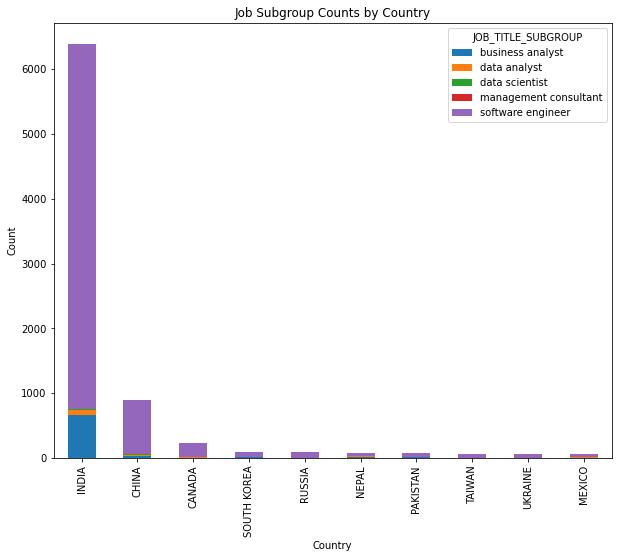

In [23]:
import matplotlib.pyplot as plt

# Select the top 10 countries by count
top_countries = data.groupby('COUNTRY_OF_CITIZENSHIP')['CASE_NUMBER'].count().nlargest(10)

# Filter data to only include selected countries and job subgroups
filtered_data = data[data['COUNTRY_OF_CITIZENSHIP'].isin(top_countries.index) & 
                     data['JOB_TITLE_SUBGROUP'].isin(['software engineer', 'business analyst', 
                                                      'management consultant', 'data analyst', 
                                                      'data scientist'])]

# Group by country and job subgroup + count the number of cases
grouped_data = filtered_data.groupby(['COUNTRY_OF_CITIZENSHIP', 'JOB_TITLE_SUBGROUP'])['CASE_NUMBER'].count()

# Reshape data to have job subgroups as columns
pivot_data = grouped_data.unstack()

# Sort countries by count of job title subgroups in descending order
order = pivot_data.sum(axis=1).sort_values(ascending=False).index
pivot_data = pivot_data.loc[order]

# Plot a stacked histogram with larger size
pivot_data.plot(kind='bar', stacked=True, figsize=(10, 8))
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Job Subgroup Counts by Country')
plt.show()


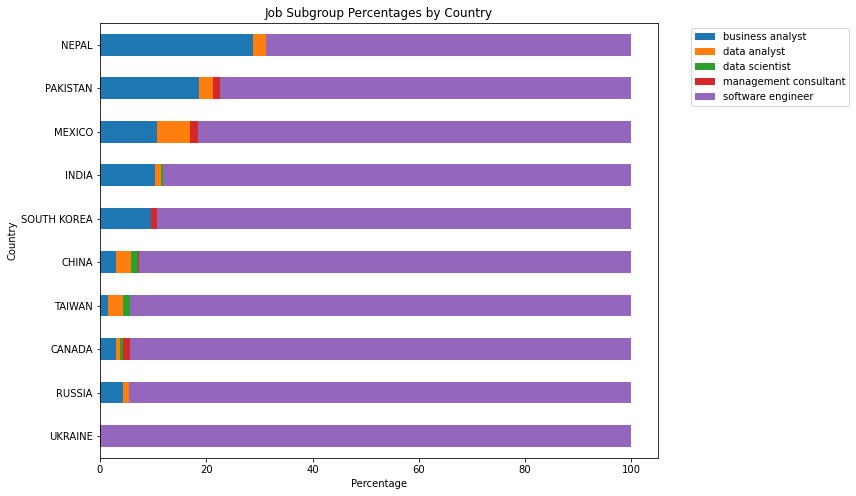

In [24]:

# Calculate the percentage of job title subgroups in each country
job_title_percentages = pivot_data.apply(lambda x: 100 * x / x.sum(), axis=1)

# Sort the countries by the percentage of software engineer jobs in descending order
job_title_percentages = job_title_percentages.loc[job_title_percentages['software engineer'].sort_values(ascending=False).index]

# Plot a stacked horizontal bar chart
ax = job_title_percentages.plot(kind='barh', stacked=True, figsize=(10,8))
ax.legend(bbox_to_anchor=(1.05, 1))
plt.xlabel('Percentage')
plt.ylabel('Country')
plt.title('Job Subgroup Percentages by Country')
plt.show()

In [25]:
# Calculate the percentage of job title subgroups in each country
job_title_percentages = pivot_data.apply(lambda x: 100 * x / x.sum(), axis=1)

# Replace NaN values with 0
job_title_percentages = job_title_percentages.fillna(0)
job_title_percentages

JOB_TITLE_SUBGROUP,business analyst,data analyst,data scientist,management consultant,software engineer
COUNTRY_OF_CITIZENSHIP,,,,,
INDIA,10.433286,1.094948,0.297200,0.109495,88.065071
CHINA,3.100775,2.768549,1.328904,0.110742,92.691030
CANADA,3.004292,0.858369,0.429185,1.287554,94.420601
SOUTH KOREA,9.677419,0.000000,0.000000,1.075269,89.247312
RUSSIA,4.347826,1.086957,0.000000,0.000000,94.565217
NEPAL,28.750000,2.500000,0.000000,0.000000,68.750000
PAKISTAN,18.666667,2.666667,0.000000,1.333333,77.333333
TAIWAN,1.428571,2.857143,1.428571,0.000000,94.285714
UKRAINE,0.000000,0.000000,0.000000,0.000000,100.000000


In [26]:
unique_values = data['CASE_STATUS'].unique()
unique_values

array(['denied', 'certified-withdrawn', 'withdrawn', 'certified',
       'certified-expired'], dtype=object)

In [27]:
# Group the data by citizenship and case status and count the number of cases
counts = df.groupby(['COUNTRY_OF_CITIZENSHIP', 'CASE_STATUS']).size().reset_index(name='COUNT')
counts_sorted = counts.sort_values(by='COUNT', ascending=False)
counts_sorted

,COUNTRY_OF_CITIZENSHIP,CASE_STATUS,COUNT
120,INDIA,certified,4158
121,INDIA,certified-expired,1864
57,CHINA,certified,670
58,CHINA,certified-expired,340
123,INDIA,withdrawn,286
...,...,...,...
240,SAUDI ARABIA,certified,1
126,INDONESIA,denied,1
238,SAINT VINCENT AND THE GRENADINES,certified,1
127,INDONESIA,withdrawn,1


In [28]:
# Select the top 10 countries by count
top_countries = data.groupby('COUNTRY_OF_CITIZENSHIP')['CASE_NUMBER'].count().nlargest(10)

# Filter the counts table to only include top 10 countries
counts_top10 = counts[counts['COUNTRY_OF_CITIZENSHIP'].isin(top_countries)]

# Sort the counts table by count in descending order
counts_sorted = counts_top10.sort_values(by='COUNT', ascending=False)
counts_sorted

,COUNTRY_OF_CITIZENSHIP,CASE_STATUS,COUNT


In [29]:
# Select the top 10 countries by count
top_countries = data.groupby('COUNTRY_OF_CITIZENSHIP')['CASE_NUMBER'].count().nlargest(10)

# Filter data to only include cases from top 10 countries
df_filtered = df[df['COUNTRY_OF_CITIZENSHIP'].isin(top_countries.index)]

# Group the filtered data by citizenship and case status and count the number of cases
counts = df_filtered.groupby(['COUNTRY_OF_CITIZENSHIP', 'CASE_STATUS']).size().reset_index(name='COUNT')
counts_sorted = counts.sort_values(by='COUNT', ascending=False)

# Filter the counts table to only include the top 10 countries
top_counts = counts_sorted[counts_sorted['COUNTRY_OF_CITIZENSHIP'].isin(top_countries.index)]
top_counts

,COUNTRY_OF_CITIZENSHIP,CASE_STATUS,COUNT
8,INDIA,certified,4158
9,INDIA,certified-expired,1864
4,CHINA,certified,670
5,CHINA,certified-expired,340
11,INDIA,withdrawn,286
10,INDIA,denied,279
0,CANADA,certified,236
28,SOUTH KOREA,certified,154
1,CANADA,certified-expired,151
12,MEXICO,certified,124


In [30]:
counts_pivoted = counts_sorted.pivot_table(index='COUNTRY_OF_CITIZENSHIP', columns='CASE_STATUS', values='COUNT')
counts_pivoted = counts_pivoted.loc[top_countries.index]
counts_pivoted.fillna(0, inplace=True)
counts_pivoted = counts_pivoted.astype(int)
counts_pivoted

CASE_STATUS,certified,certified-expired,denied,withdrawn
COUNTRY_OF_CITIZENSHIP,,,,
INDIA,4158,1864,279,286
CHINA,670,340,34,57
CANADA,236,151,19,19
SOUTH KOREA,154,82,14,19
RUSSIA,70,30,6,3
NEPAL,55,28,6,3
PAKISTAN,50,26,4,4
TAIWAN,72,33,3,2
UKRAINE,45,20,2,4


In [31]:
# Calculate the percentage of each citizenship that falls into each case status category
df_pct = df.groupby(['COUNTRY_OF_CITIZENSHIP', 'CASE_STATUS'])['CASE_NUMBER'].count() \
    .groupby(level=0).apply(lambda x: 100 * x / x.sum()) \
    .reset_index(name='PERCENTAGE')

# Pivot the table to display the percentage of each citizenship that falls into each case status category
table = pd.pivot_table(df_pct, values='PERCENTAGE', index='COUNTRY_OF_CITIZENSHIP', columns='CASE_STATUS')

# Sort the table by the total count of certified and certified-expired cases in descending order
table = table.loc[table.sum(axis=1).sort_values(ascending=False).index]

# Round the percentage values to two decimal places
table = table.round(2)

# Display the table
print(table)


CASE_STATUS             certified  certified-expired  denied  withdrawn
COUNTRY_OF_CITIZENSHIP                                                 
BRAZIL                      60.61              34.85    1.52       3.03
CZECH REPUBLIC              66.67              16.67   16.67        NaN
GREECE                      29.17              66.67     NaN       4.17
COLOMBIA                    45.16              35.48   12.90       6.45
SOUTH KOREA                 57.25              30.48    5.20       7.06
...                           ...                ...     ...        ...
NIGERIA                     61.54              30.77    3.85       3.85
TURKEY                      58.97              29.49    3.85       7.69
PERU                        62.50               8.33   20.83       8.33
RUSSIA                      64.22              27.52    5.50       2.75
EGYPT                       48.15              44.44     NaN       7.41

[134 rows x 4 columns]


In [32]:
# Select the top 10 countries by count
top_countries = data.groupby('COUNTRY_OF_CITIZENSHIP')['CASE_NUMBER'].count().nlargest(10).index.tolist()

# Filter the data frame to only include top 10 countries
df_top10 = df[df['COUNTRY_OF_CITIZENSHIP'].isin(top_countries)]

# Calculate percentage of each case status for each country
table = pd.pivot_table(df_top10, values='CASE_NUMBER', index=['COUNTRY_OF_CITIZENSHIP'], columns=['CASE_STATUS'], aggfunc=lambda x: len(x) / len(df_top10) * 100)
table.columns.name = ''
table = table.reset_index()
table


,COUNTRY_OF_CITIZENSHIP,certified,certified-expired,denied,withdrawn
0,CANADA,2.592552,1.658794,0.208722,0.208722
1,CHINA,7.360211,3.735032,0.373503,0.626167
2,INDIA,45.677249,20.476766,3.064924,3.141821
3,MEXICO,1.362188,0.714050,0.637153,0.087883
4,NEPAL,0.604196,0.307591,0.065912,0.032956
5,PAKISTAN,0.549269,0.285620,0.043942,0.043942
6,RUSSIA,0.768977,0.329562,0.065912,0.032956
7,SOUTH KOREA,1.691750,0.900802,0.153795,0.208722
8,TAIWAN,0.790948,0.362518,0.032956,0.021971
9,UKRAINE,0.494343,0.219708,0.021971,0.043942


In [33]:

# Create a contingency table of job title subgroup and case status
ct = pd.crosstab(data['JOB_TITLE_SUBGROUP'], data['CASE_STATUS'])

# Calculate the percentage of cases that were certified or denied for each job title subgroup
ct_pct = ct.apply(lambda r: r/r.sum(), axis=1) * 100

In [34]:
ct_pct.head()

CASE_STATUS,certified,certified-expired,certified-withdrawn,denied,withdrawn
JOB_TITLE_SUBGROUP,,,,,
business analyst,88.317572,0.690374,6.112689,1.815828,3.063536
data analyst,87.447917,1.015625,6.406250,1.614583,3.515625
data scientist,86.552567,1.303993,6.682967,1.385493,4.074980
management consultant,87.142857,0.649351,6.363636,2.987013,2.857143
software engineer,83.853307,2.215088,8.723481,1.934302,3.273822


Text(0.5, 1.0, 'Job Title Subgroup vs. Case Status')

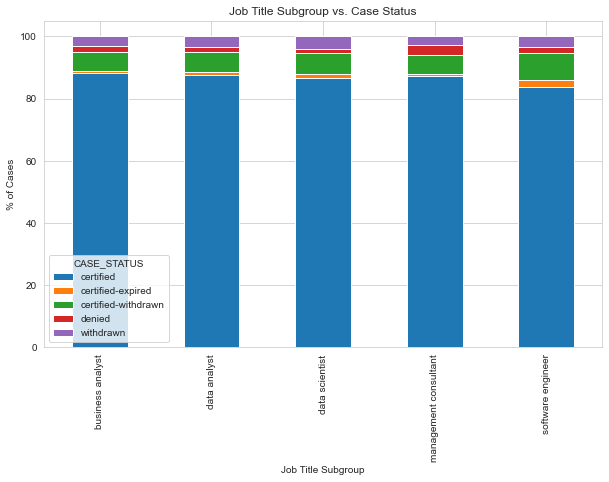

In [34]:
# Visualize the relationship between job title subgroup and case status using a stacked bar chart
sns.set_style('whitegrid')
ct_pct.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Job Title Subgroup')
plt.ylabel('% of Cases')
plt.title('Job Title Subgroup vs. Case Status')

In [35]:
# Conduct a chi-square test of independence
chi2, p, dof, expected = chi2_contingency(ct)


# Print the results
print("Contingency Table:")
print(ct)
print("Chi-Square Test Results:")
print("Chi2 =", chi2)
print("p-value =", p)
print("Degrees of Freedom =", dof)
print("Expected Frequencies:")
print(expected)

# Interpret the results
if p < 0.05:
    print('There is a significant association between job title subgroup and case status.')

Contingency Table:
CASE_STATUS            certified  certified-expired  certified-withdrawn  \
JOB_TITLE_SUBGROUP                                                         
business analyst           24562                192                 1700   
data analyst                3358                 39                  246   
data scientist              1062                 16                   82   
management consultant        671                  5                   49   
software engineer          83320               2201                 8668   

CASE_STATUS            denied  withdrawn  
JOB_TITLE_SUBGROUP                        
business analyst          505        852  
data analyst               62        135  
data scientist             17         50  
management consultant      23         22  
software engineer        1922       3253  
Chi-Square Test Results:
Chi2 = 571.8674131169422
p-value = 2.102430082907863e-111
Degrees of Freedom = 16
Expected Frequencies:
[[2.36211177e+04 5